Considerando a relação entre escolaridade e acesso à saneamento, o objetivo desse projeto é desenvolver uma análise exploratória simples dos dados fornecidos para RS e PE considerando o censo de 2010 e, após inferências, aplicar um modelo simples de regressão linear para testar a correlação entre os índices fornecidos. Assim, a etapa final do presente projeto é o desenvolvimento deum modelo simples de regressão linear para prever o percentual de acesso à saneamento básico a partir da escolaridade. O modelo será testado tanto para os dados do RS quanto os de PE e então os resultados serão comparados.

# Carregando dados e importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# usando Pandas para analisar os dados
df_PE = pd.read_excel('')
df_PE.head()

,Territorialidades,% dos ocupados com ensino fundamental completo 2010,% da população que vive em domicílios com banheiro e água encanada 2010
0,Abreu E Lima (PE),63.85,92.62
1,Afogados da Ingazeira (PE),47.69,80.93
2,Afrânio (PE),36.55,44.90
3,Agrestina (PE),36.77,83.68
4,Água Preta (PE),36.72,64.03


In [ ]:
import pandas as pd
df_RS = pd.read_excel('')
df_RS.head()

,Territorialidades,% dos ocupados com ensino fundamental completo 2010,% da população que vive em domicílios com banheiro e água encanada 2010
0,Aceguá (RS),39.76,89.13
1,Água Santa (RS),41.53,99.27
2,Agudo (RS),43.11,94.06
3,Ajuricaba (RS),48.93,98.93
4,Alecrim (RS),33.72,93.19


# Análise Exploratória



In [ ]:
# a função describe(), do Pandas, retorna um resumo dos dados contidos nas tabelas, com média e valores máximos, por exemplo.
# Primeiramente, geramos um resumo considerando os dados do RS.
df_RS.describe()

,% dos ocupados com ensino fundamental completo 2010,% da população que vive em domicílios com banheiro e água encanada 2010
count,495.000000,495.000000
mean,47.925798,95.342101
std,10.881123,5.367870
min,23.710000,55.270000
25%,39.530000,93.830000
50%,46.990000,96.870000
75%,55.575000,98.765000
max,80.760000,100.000000


In [ ]:
# agora com os dados de PE.
df_PE.describe()

,% dos ocupados com ensino fundamental completo 2010,% da população que vive em domicílios com banheiro e água encanada 2010
count,184.000000,184.000000
mean,39.420435,64.312120
std,10.589910,17.424704
min,19.990000,18.760000
25%,32.457500,52.800000
50%,37.595000,65.855000
75%,44.395000,78.785000
max,79.380000,98.730000


A partir desses valores, percebemos que, considerando o Censo de 2010, a média do percentual dos ocupados com ensino fundamental completo é maior no Rio Grande do Sul do que em Pernambuco, bem como o acesso à saneamento básico (considerando a população que vive em domicílio com banheiro e água encanada).

O próximo passo é plottar gráficos para que a possível relação entre as duas variáveis possa ser melhor visualizada.

<Axes: xlabel='% dos ocupados com ensino fundamental completo 2010', ylabel='% da população que vive em domicílios com banheiro e água encanada 2010'>

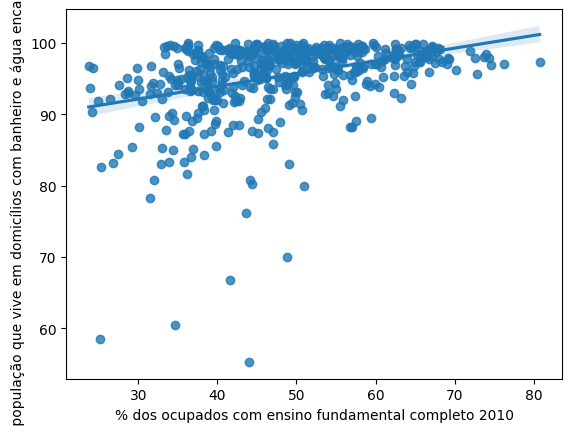

In [ ]:
# Primeiramente, utilizando a biblioteca Seaborn, geraremos um gráfico para os dados do RS, com os dados de saneamento no eixo y e os de escolaridade no eixo x.
sns.regplot(x='% dos ocupados com ensino fundamental completo 2010', y='% da população que vive em domicílios com banheiro e água encanada 2010', data=df_RS)

<Axes: xlabel='% dos ocupados com ensino fundamental completo 2010', ylabel='% da população que vive em domicílios com banheiro e água encanada 2010'>

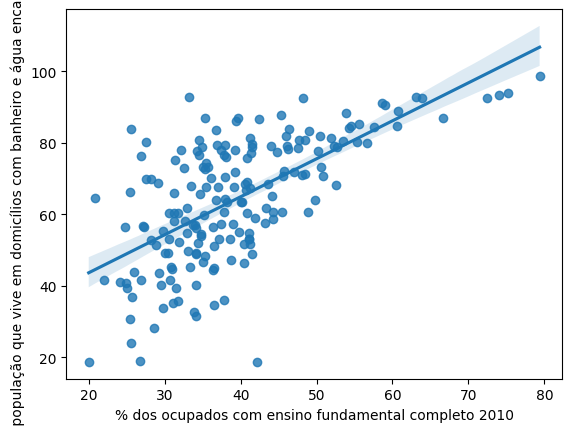

In [ ]:
# Agora, faremos a mesma coisa para os dados de PE.
sns.regplot(x='% dos ocupados com ensino fundamental completo 2010', y='% da população que vive em domicílios com banheiro e água encanada 2010', data=df_PE)

Apenas visualizando os gráficos, é possível inferir que a relação entre os dois índices considerados é maior no estado do PE, visto que os dados estão menos disperços. Iremos verificar se essa inferência é válida a partir dos resultados do modelo de regressão.

Além da visualização, algumas funções do Pandas também são úteis para analisar possíveis correlações entre duas variáveis:

In [ ]:
df_RS.corr()

<ipython-input-18-889c43d51c1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_RS.corr()


,% dos ocupados com ensino fundamental completo 2010,% da população que vive em domicílios com banheiro e água encanada 2010
% dos ocupados com ensino fundamental completo 2010,1.00000,0.36136
% da população que vive em domicílios com banheiro e água encanada 2010,0.36136,1.00000


In [ ]:
df_PE.corr()

<ipython-input-19-7220355d4284>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_PE.corr()


,% dos ocupados com ensino fundamental completo 2010,% da população que vive em domicílios com banheiro e água encanada 2010
% dos ocupados com ensino fundamental completo 2010,1.000000,0.645309
% da população que vive em domicílios com banheiro e água encanada 2010,0.645309,1.000000


Além disso, como demonstrado, a correlação entre os dois índices é de fato maior para PE do que para o RS, sendo de aproximadamente 64%, enquanto é de 36% para o RS.

# Modelo de Regressão Linear

O OLS, ou Ordinary Least Squares, é um método útil para avaliar um modelo de regressão linear.

A biblioteca statsmodels ajusta uma linha no conjunto de dados que passa pela origem e, depois de adicionar a constante ao seu conjunto de dados X_train, é possível ajustar uma linha de regressão usando o atributo OLS (Ordinary Least Squares) da mesma biblioteca (statsmodels).

Visto isso, primeiramente aplicaremos o modelo para os dados do RS:

In [ ]:
# definindo x e y
X=df_RS['% dos ocupados com ensino fundamental completo 2010']

y=df_RS['% da população que vive em domicílios com banheiro e água encanada 2010']

In [ ]:
# dividindo dados entre treino e teste, em proporção 70-30.
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=100)

In [ ]:
X_train_sm=sm.add_constant(X_train)

# treinando modelo

lr=sm.OLS(y_train, X_train_sm)

lr_model=lr.fit()

# visualizando parâmetros

lr_model.params

const                                                  88.919493
% dos ocupados com ensino fundamental completo 2010     0.139375
dtype: float64

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                       OLS Regression Results                                                      
===================================================================================================================================
Dep. Variable:     % da população que vive em domicílios com banheiro e água encanada 2010   R-squared:                       0.124
Model:                                                                                 OLS   Adj. R-squared:                  0.122
Method:                                                                      Least Squares   F-statistic:                     48.87
Date:                                                                     Mon, 22 May 2023   Prob (F-statistic):           1.43e-11
Time:                                                                             02:35:55   Log-Likelihood:                -971.14
No. Observations:                                                                      346   AIC:                             1946.
Df Residuals:                                                                          344   BIC:                             1954.
Df Model:                                                                                1                                         
Covariance Type:                                                                 nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  88.9195      0.981     90.619      0.000      86.989      90.849
% dos ocupados com ensino fundamental completo 2010     0.1394      0.020      6.991      0.000       0.100       0.179
==============================================================================
Omnibus:                      152.394   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              734.484
Skew:                          -1.844   Prob(JB):                    3.23e-160
Kurtosis:                       9.111   Cond. No.                         224.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observando algumas estatísticas importantes a partir do resumo gerado, considerando que os principais valores a serem analisados são os coeficientes e significância (valores-p), R ao quadrado e Estatística F, temos que:

1. O coeficiente para a escolaridade é 0.1394. Assim, o coeficiente é estatisticamente significativo. Portanto, a associação não é puramente por acaso.

2. R-squared é 0.124, significando que 12,4% da variação no saneamento no RS é explicada pela escolaridade, ou seja, o valor é baixo.

3. A estatística F tem um valor p praticamente baixo, o que significa que o ajuste do modelo é estatisticamente significativo e a variância explicada não é puramente por acaso.

Agora, realizaremos a mesma análise para PE e compararemos os resultados:

In [ ]:
# definindo x e y
X=df_PE['% dos ocupados com ensino fundamental completo 2010']

y=df_PE['% da população que vive em domicílios com banheiro e água encanada 2010']

# dividindo dados entre treino e teste, em proporção 70-30.
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=100)

X_train_sm=sm.add_constant(X_train)

# treinando modelo
lr=sm.OLS(y_train, X_train_sm)

lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                       OLS Regression Results                                                      
===================================================================================================================================
Dep. Variable:     % da população que vive em domicílios com banheiro e água encanada 2010   R-squared:                       0.382
Model:                                                                                 OLS   Adj. R-squared:                  0.377
Method:                                                                      Least Squares   F-statistic:                     77.82
Date:                                                                     Mon, 22 May 2023   Prob (F-statistic):           7.85e-15
Time:                                                                             02:44:26   Log-Likelihood:                -523.21
No. Observations:                                                                      128   AIC:                             1050.
Df Residuals:                                                                          126   BIC:                             1056.
Df Model:                                                                                1                                         
Covariance Type:                                                                 nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  22.4376      4.880      4.598      0.000      12.781      32.094
% dos ocupados com ensino fundamental completo 2010     1.0513      0.119      8.822      0.000       0.815       1.287
==============================================================================
Omnibus:                        0.958   Durbin-Watson:                   2.289
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.574
Skew:                          -0.126   Prob(JB):                        0.750
Kurtosis:                       3.210   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finalmente, observando as mesmas estatísticas que as do modelo do RS, para comparação:

1. O coeficiente para a escolaridade é 1.0513, maior que a do modelo anterior.

2. Valor do R-squared é 0.382, maior que o do RS, significando que 38,2% da variação no saneamento é explicada pela escolaridade em PE.

3. A estatística F tem um valor maior que a do modelo anterior, mas ainda baixo.

Dessa forma, considerando principalmente os valores de R ao quadrado, pode-se perceber que a correlação entre os índices de saneamento e escolaridade é de fato maior para Pernambuco do que para o Rio Grande do Sul.